In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

pd.set_option("display.precision", 2)
frac = 0.000002

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/MachineLearning/Project/Datasets/onlinefraud.csv"
dataset = pd.read_csv(path);

## Özniteliklerin incelenmesi

In [3]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

***step***: 1 adımın 1 saate eşit olduğu bir zaman birimini temsil eder.

***type***: İşlemin tipi

***amount***: İşlemin miktarı

***nameOrig***: Müşternin işleme başlaması

***oldbalanceOrg***: İşlemden önce bakiye

***newbalanceOrig***: İşlemden sonra bakiye

***nameDest***: İşlemin alıcısı

***oldbalanceDest***: İşlemden önce alıcının ilk bakiyesi

***newbalanceDest***: İşlemden sonra alıcının ilk bakiyesi

***isFraud***: Sahtecilik mi değil mi

**isFlaggedFraud**: -

## Veri setinin içeriğini kontrol ediyoruz

In [4]:
print("Satır Sayısı: {}".format(dataset.shape[0]))
print("Öznitelik Syısı: {}".format(dataset.shape[1]))
print("Fraud İşlem Sayısı: {}".format(dataset[dataset['isFraud'] == 1].shape[0]))
print("FraudFlagged İşlem Sayısı: {}".format(dataset[dataset['isFlaggedFraud'] == 1].shape[0]))

Satır Sayısı: 6362620
Öznitelik Syısı: 11
Fraud İşlem Sayısı: 8213
FraudFlagged İşlem Sayısı: 16


In [5]:
dataset.sample(frac=frac)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4665313,330,PAYMENT,1721.97,C669842532,2.95e+04,2.78e+04,M226297824,0.00e+00,0.00e+00,0,0
5114307,356,PAYMENT,14765.68,C1118949772,5.02e+04,3.55e+04,M671691968,0.00e+00,0.00e+00,0,0
4501363,325,CASH_IN,211630.18,C351204716,2.66e+06,2.87e+06,C564012370,6.93e+06,6.71e+06,0,0
5486654,380,PAYMENT,10474.47,C88454612,4.62e+04,3.57e+04,M1213858091,0.00e+00,0.00e+00,0,0
5081728,355,PAYMENT,1328.84,C1798489680,4.06e+04,3.92e+04,M533386525,0.00e+00,0.00e+00,0,0
3539447,260,TRANSFER,519007.34,C745963634,6.19e+03,0.00e+00,C2001604944,3.79e+06,4.31e+06,0,0
2695099,211,CASH_IN,142361.52,C68802210,1.84e+06,1.98e+06,C787839563,7.59e+06,7.45e+06,0,0
5107095,355,TRANSFER,146112.49,C55613938,5.17e+04,0.00e+00,C2064066116,5.44e+05,6.90e+05,0,0
3631054,274,CASH_OUT,104160.80,C658189143,0.00e+00,0.00e+00,C808880569,2.31e+06,2.41e+06,0,0
2037853,180,CASH_OUT,321582.13,C974823560,2.13e+04,0.00e+00,C1541622577,2.69e+05,8.24e+05,0,0


Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [6]:
dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Veri setinin istatiksel bilgilerinin gösterilmiştir (count mean std vb)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6.36e+06,2.43e+02,1.42e+02,1.0,156.00,239.00,3.35e+02,7.43e+02
amount,6.36e+06,1.80e+05,6.04e+05,0.0,13389.57,74871.94,2.09e+05,9.24e+07
oldbalanceOrg,6.36e+06,8.34e+05,2.89e+06,0.0,0.00,14208.00,1.07e+05,5.96e+07
newbalanceOrig,6.36e+06,8.55e+05,2.92e+06,0.0,0.00,0.00,1.44e+05,4.96e+07
oldbalanceDest,6.36e+06,1.10e+06,3.40e+06,0.0,0.00,132705.66,9.43e+05,3.56e+08
newbalanceDest,6.36e+06,1.22e+06,3.67e+06,0.0,0.00,214661.44,1.11e+06,3.56e+08
isFraud,6.36e+06,1.29e-03,3.59e-02,0.0,0.00,0.00,0.00e+00,1.00e+00
isFlaggedFraud,6.36e+06,2.51e-06,1.59e-03,0.0,0.00,0.00,0.00e+00,1.00e+00


Kategorik Değişkenlerin de incelenmesi görülmüştür.

In [8]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.4,142.33,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.9,603858.23,0.0,13389.57,74871.94,208721.48,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.1,2888242.67,0.0,0.0,14208.0,107315.18,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.67,2924048.5,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.67,3399180.11,0.0,0.0,132705.66,943036.71,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.4,3674128.94,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.0,0.04,0.0,0.0,0.0,0.0,1.0


## Kategorik Özniteliklerin incelenmesi

nameOrig ve nameDest değişkenlerinin,yukarıda gördüğümüz üzer benzersiz değerleri çok fazla olduğu için incelenmemiştir.

In [9]:
dataset.drop(['nameOrig', 'nameDest'], axis=1, inplace = True)

In [10]:
categoricalColumns = dataset.select_dtypes(include = ["object"])

In [11]:
categoricalColumns.sample(frac=frac)

,type
5113905,CASH_OUT
2095015,CASH_IN
1071027,TRANSFER
6057728,PAYMENT
359633,CASH_OUT
3740167,DEBIT
1885316,PAYMENT
4320857,PAYMENT
2349613,CASH_IN
4830993,TRANSFER


In [12]:
categoricalColumns["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
categoricalColumns["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

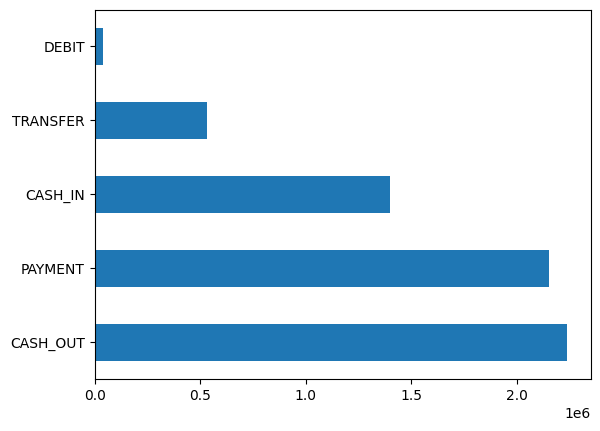

In [14]:
categoricalColumns["type"].value_counts().plot.barh();

In [15]:
type = dataset["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(dataset, values=quantity, names=transactions, hole = 0.5, title="İşlemlerin Dağılımı")
figure.show()

## Nicel Analiz

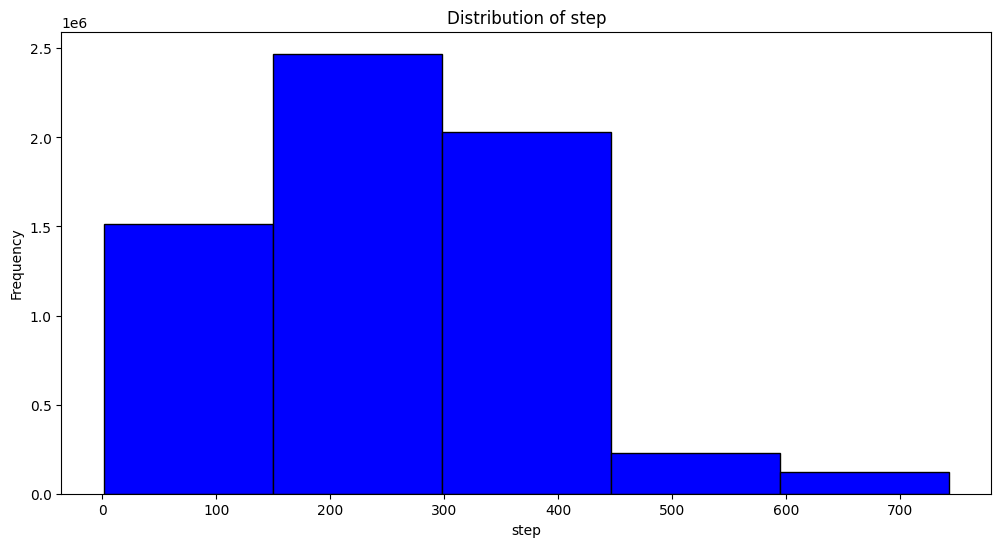

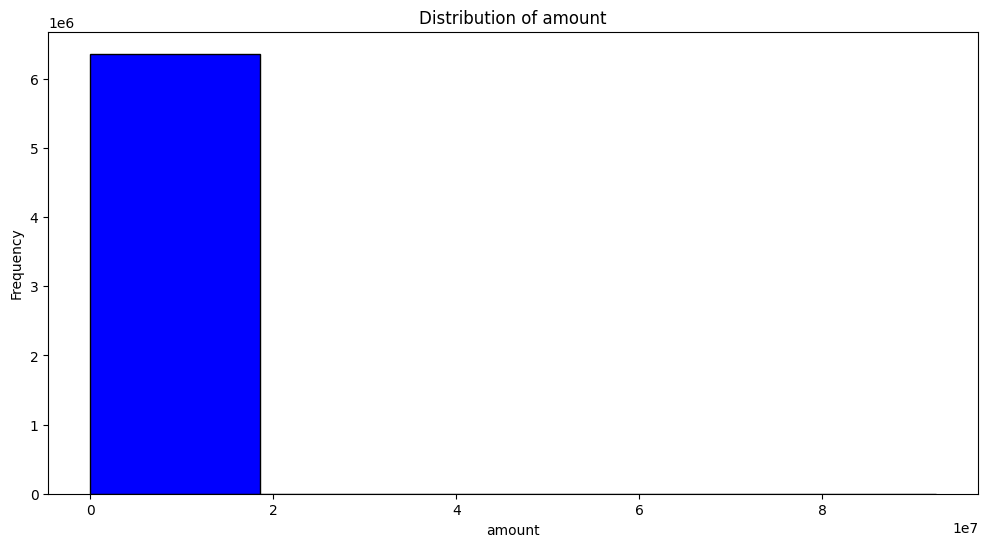

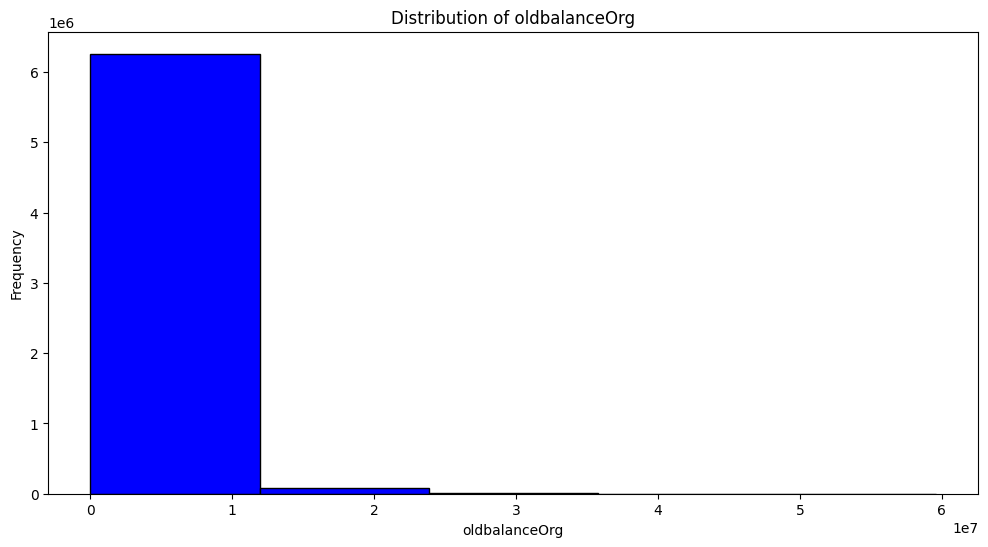

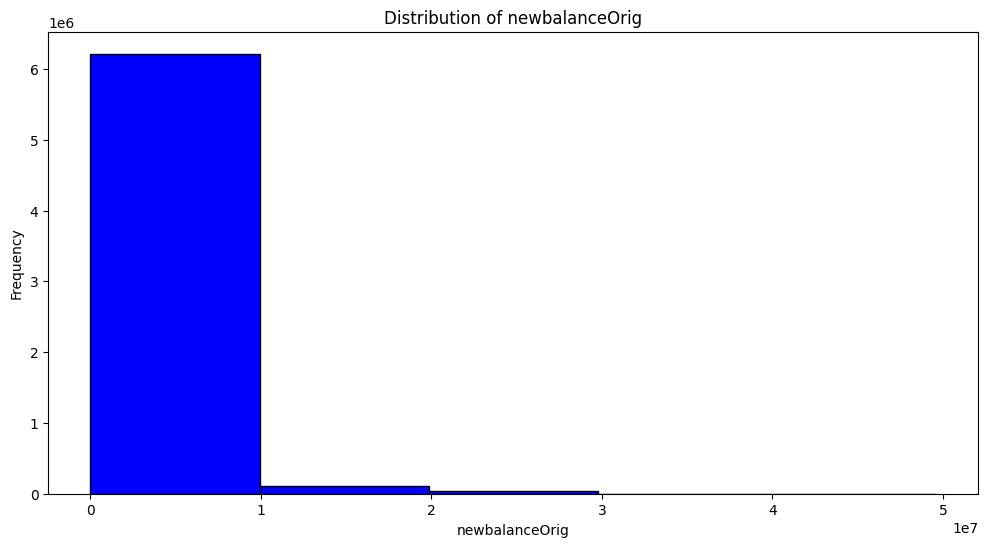

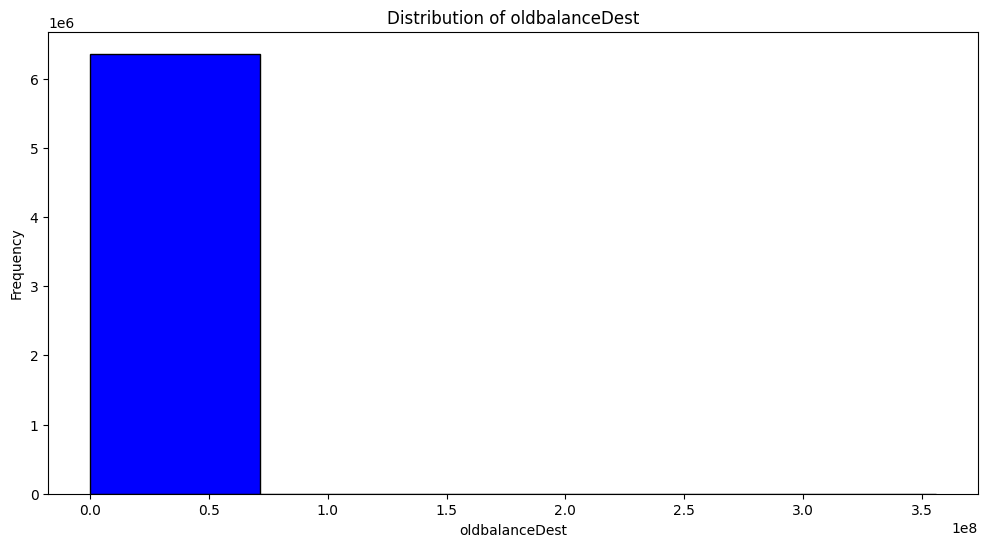

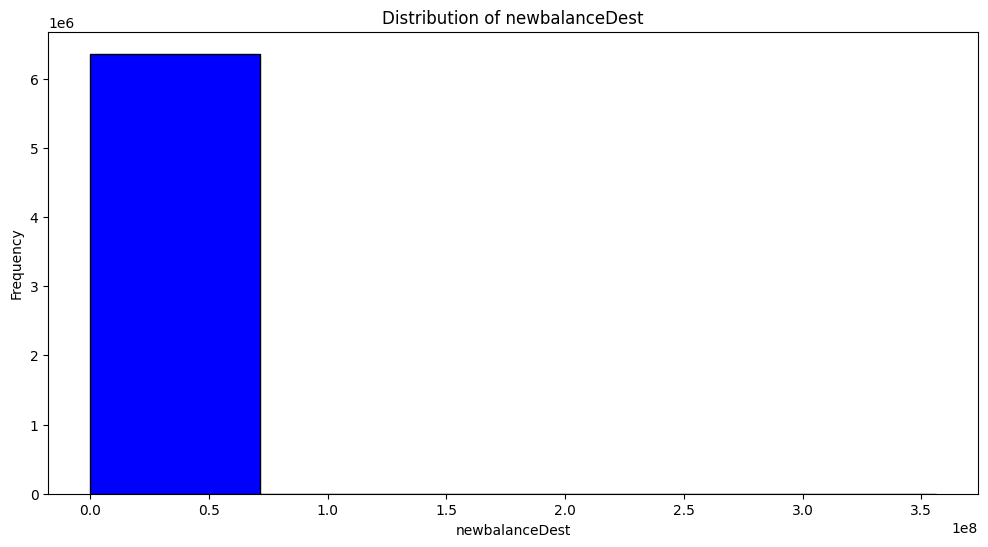

In [16]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    dataset[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='blue',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

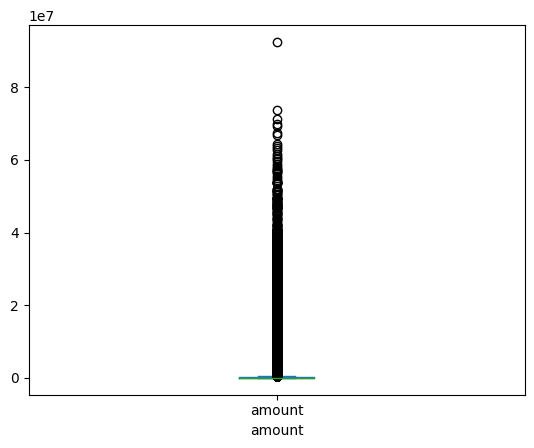

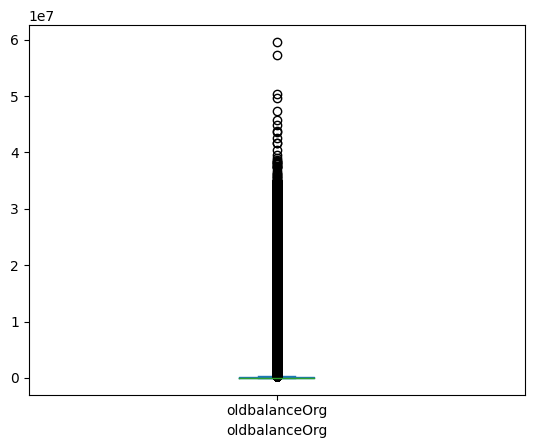

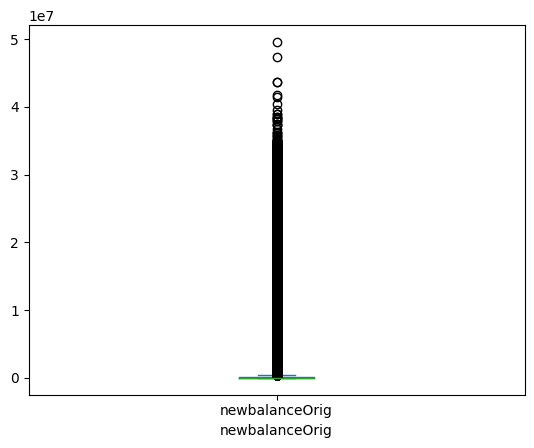

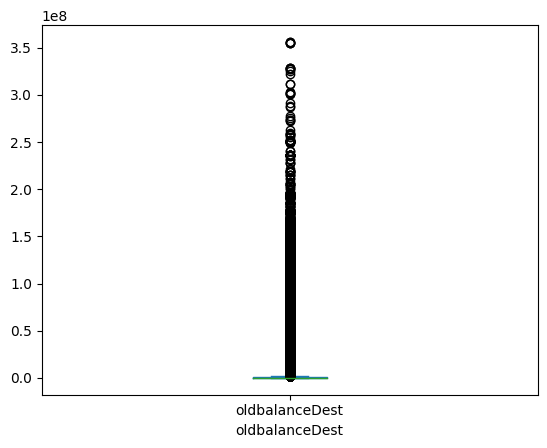

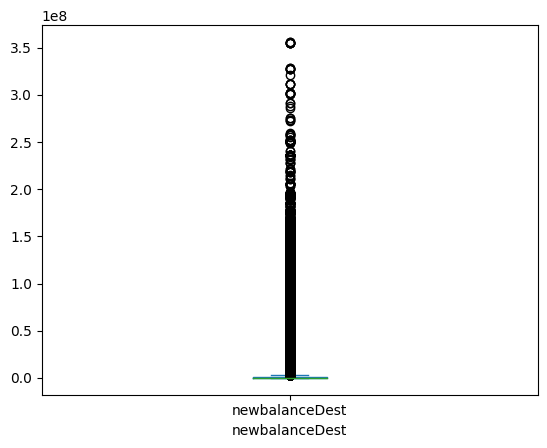

In [17]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    dataset[i].plot(kind='box')
    plt.show()

In [18]:
CrosstabResult=pd.crosstab(index=dataset.type,columns=dataset.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


(3500.0, 7000.0)

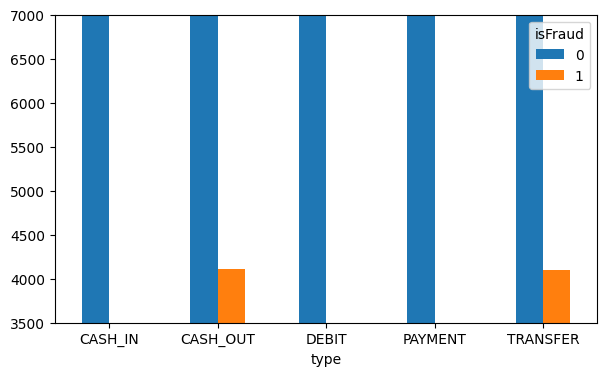

In [19]:
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

## Korelasyonların İncelenmesi

<Axes: >

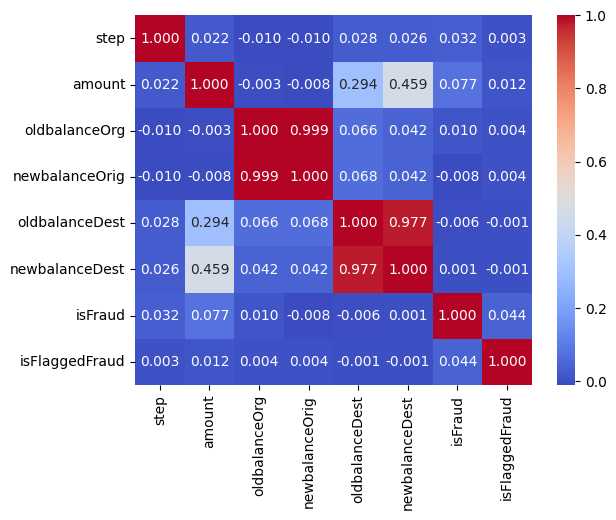

In [20]:
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm' ,fmt=".3f")

## Boxplotların çizimi

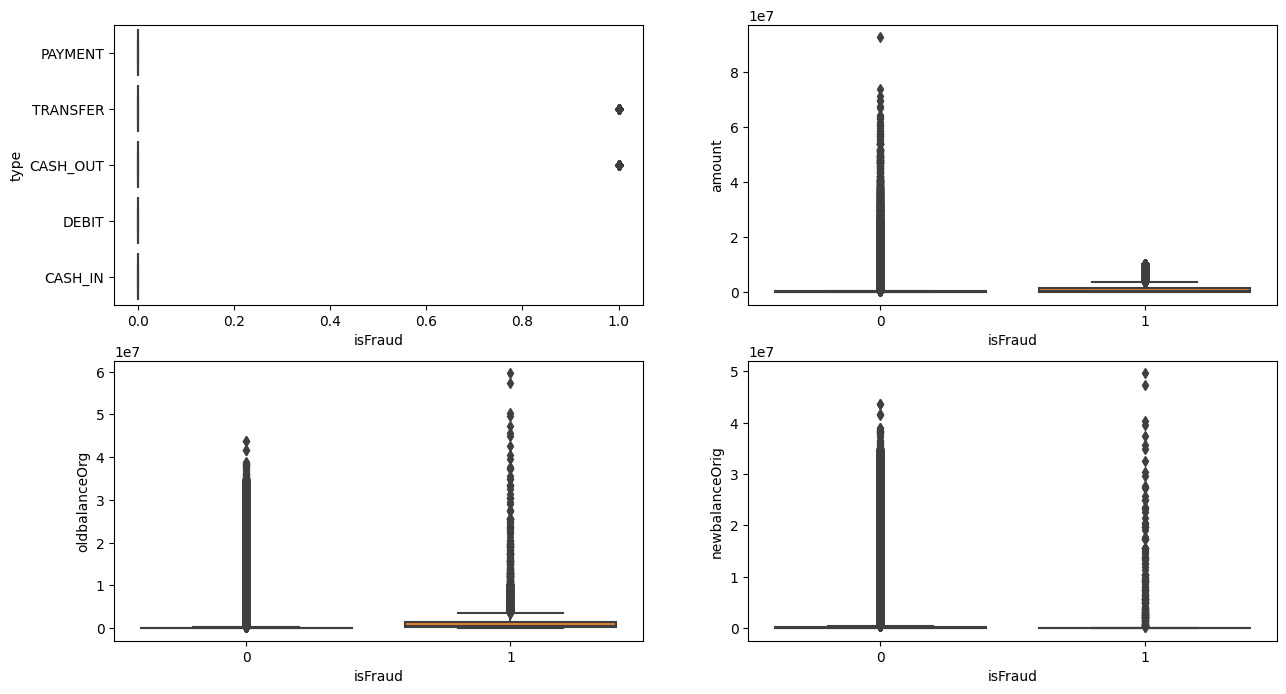

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, col in enumerate(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']):
    sns.boxplot(x="isFraud", y=col, data=dataset, ax=ax[i//2][i%2])

## Histogramların Çizdirilmesi

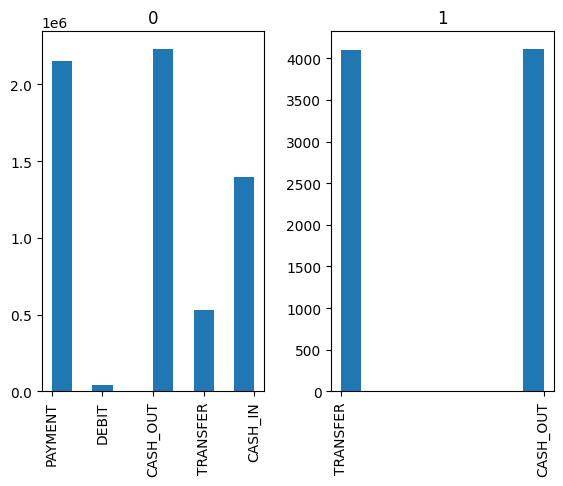

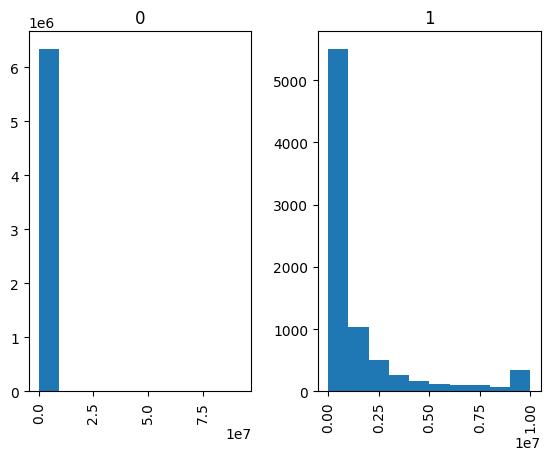

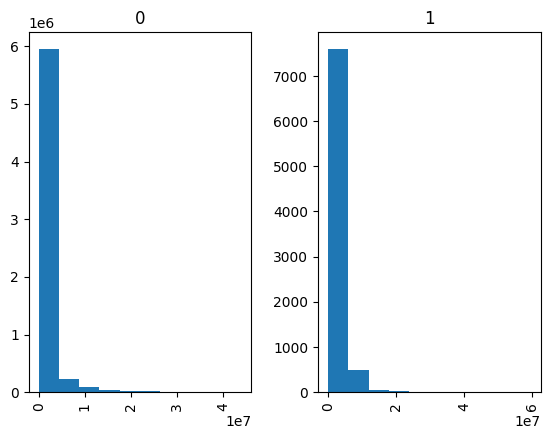

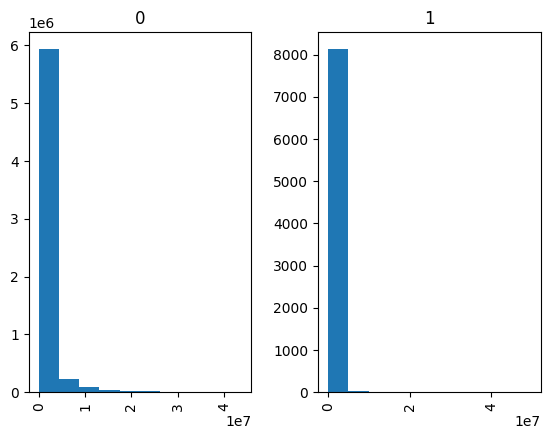

In [22]:
for i, column in enumerate(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']):
  dataset[column].hist(by=dataset["isFraud"])

## Eğitim ve Test setlerinin ayrılması

Öncelikle X ve y olarak ayrılmış olup daha sonra X içerisinde kalan kategorik değişkenin dönüşümü yapılmıştır.

In [23]:
y = dataset['isFraud']
X = dataset.drop(['step', 'oldbalanceDest','newbalanceDest', 'isFraud', 'isFlaggedFraud'], axis=1)
X = pd.get_dummies(X,drop_first=True)
X.head()

,amount,oldbalanceOrg,newbalanceOrig,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0,0,1,0
1,1864.28,21249.0,19384.72,0,0,1,0
2,181.00,181.0,0.00,0,0,0,1
3,181.00,181.0,0.00,1,0,0,0
4,11668.14,41554.0,29885.86,0,0,1,0


In [29]:
print("X Yapısı: {}".format(X.shape))
print("y Yapısı : {}".format(y.shape))

X Yapısı: (6362620, 7)
y Yapısı : (6362620,)


Eğitim ve Test veri setleri ayrılmıştır

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("Eğitim seti satır sayısı: {}".format(X_train.shape[0]))
print("Test seti satır sayısı: {}".format(X_test.shape[0]))

Eğitim seti satır sayısı: 5090096
Test seti satır sayısı: 1272524


In [32]:
X_train.head()

,amount,oldbalanceOrg,newbalanceOrig,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6271196,386385.08,4.67e+06,5.06e+06,0,0,0,0
1888243,212458.78,2.35e+05,4.47e+05,0,0,0,0
5549957,19967.60,3.63e+03,0.00e+00,0,0,1,0
2025342,527616.51,1.80e+05,0.00e+00,1,0,0,0
682342,206067.85,0.00e+00,0.00e+00,0,0,0,1


In [25]:
y_train.head()

6271196    0
1888243    0
5549957    0
2025342    0
682342     0
Name: isFraud, dtype: int64

In [26]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN Modeli

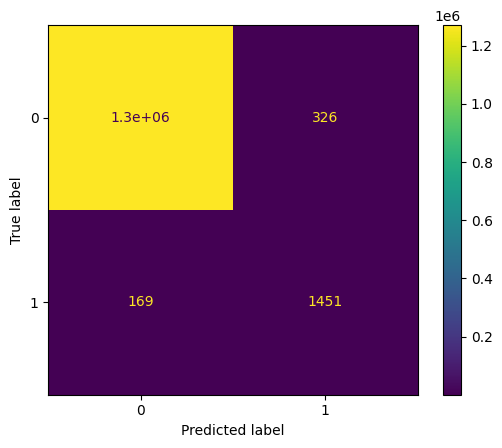


Accuracy: 99.96%

Recall: 89.57%

Precision: 81.65%

F1 Skor: 85.43%



In [27]:
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);
print()
print("Accuracy: {:.2%}".format(acc))
print()
print("Recall: {:.2%}".format(rec))
print()
print("Precision: {:.2%}".format(prec))
print()
print("F1 Skor: {:.2%}".format(f1))
print()

Accuracy, Recall, Precision ve F1 Skor metriklerinin tamamı %80'inin üzerinde çıkarak modelin 5 komşuluk ve öklüd uzaklığı için oldukça iyi çalıştığı gözlemlenmiştir. Yalnız KNN algıritmasının öğrenmesi çok hızlı olmasına rağmen tahmin aşaması 20 dakika sürmüştür. Bunun sebebi veri setinin 6.7 milyon satırdan oluşmasıdır.